In [1]:
# Importa o Sympy
import sympy as sp

# Importa o Numpy
import numpy as np

# Importa o Matplot lib
import matplotlib.pyplot as plt

# Importa o módulo Toolbox
import Toolbox as T


In [8]:
# Equação Diferencial
# Int(d²V/dx²*EI*d²w/dx²*dx) = Int(w*q*dx)+w*V|L-0 + dw/dx*M|L-0


# Define variável
x = sp.symbols('x')
L = sp.symbols('L')
x0 = 0
x1 = L
EI = sp.symbols('EI')
q = 0
M0=sp.symbols('M0')

a0, a1, a2, a3,a4  = sp.symbols('a0 a1 a2 a3 a4')
b0, b1, b2, b3,b4  = sp.symbols('b0 b1 b2 b3 b4')

base   = (a0,a1,a2,a3,a4)
base_b = (b0,b1,b2,b3,b4)

# Base
f_base = a0+a1*x+a2*x**2+a3*x**3+a4*x**4

sp.pprint(sp.latex(f_base))


w_base = b0+b1*x+b2*x**2+b3*x**3+b4*x**4

#Compatibiliza Equações

f_compat,t = T.compatibiliza_cc_com_derivada(f_base,x,(a0,a1,a2,a3,a4),[('valor',0,0),('derivada',0,0),('2derivada',0,-M0/EI),('3derivada',0,0)])

w_compat,t = T.compatibiliza_cc_com_derivada(w_base,x,(b0,b1,b2,b3,b4),[('valor',0,0),('derivada',0,0),('2derivada',0,-M0/EI),('3derivada',0,0)])

sp.pprint(sp.latex(f_compat))

#Vamos partir da equação do momento para desenvolver nossa análise
M = EI*sp.diff(f_compat,x,2)

sp.pprint(sp.latex(sp.Eq(M,-M0)))

#A forma fraca da equação fica:

LE1 = w_compat*sp.diff(f_compat,x)

LE2 = sp.integrate(sp.diff(f_compat,x)*sp.diff(w_compat,x),(x,x0,x1))

LE = (LE1.subs(x,x1)-LE1.subs(x,x0))-LE2

LD = sp.integrate(w_compat*M0/EI,(x,x0,x1))

eqs = [sp.collect(LE-LD.expand().simplify(),b,evaluate=False).get(b,0) for b in base_b]

sp.pprint(eqs)

sol = sp.solve(eqs,base)

sp.pprint(sol)

f_residuos_pond = f_compat.subs(sol).simplify()

sp.pprint(sp.latex(f_residuos_pond))


a_{0} + a_{1} x + a_{2} x^{2} + a_{3} x^{3} + a_{4} x^{4}
a_{4} x^{4} - \frac{M_{0} x^{2}}{2 EI}
EI \left(12 a_{4} x^{2} - \frac{M_{0}}{EI}\right) = - M_{0}
⎡                 7    ⎤
⎢            -16⋅L ⋅a₄ ⎥
⎢0, 0, 0, 0, ──────────⎥
⎣                7     ⎦
{a₄: 0}
- \frac{M_{0} x^{2}}{2 EI}


In [10]:
a0, a1, a2, a3,a4  = sp.symbols('a0 a1 a2 a3 a4')
b0, b1, b2, b3,b4  = sp.symbols('b0 b1 b2 b3 b4')

base   = (a0,a1,a2,a3,a4)
base_b = (b0,b1,b2,b3,b4)

# Base
f_base = a1*sp.sin(sp.pi*x/L)+a2*sp.sin(sp.pi*2*x/L)+a3*sp.cos(sp.pi*x/L)+a4*sp.cos(sp.pi*2*x/L)

w_base = b1*sp.sin(sp.pi*x/L)+b2*sp.sin(sp.pi*2*x/L)+b3*sp.cos(sp.pi*x/L)+b4*sp.cos(sp.pi*2*x/L)

sp.pprint(sp.latex(f_base))
#Compatibiliza Equações

f_compat,t = T.compatibiliza_cc_com_derivada(f_base,x,(a0,a1,a2,a3,a4),[('valor',0,0),('derivada',0,0),('2derivada',0,-M0/EI),('3derivada',0,0)])

w_compat,t = T.compatibiliza_cc_com_derivada(w_base,x,(b0,b1,b2,b3,b4),[('valor',0,0),('derivada',0,0),('2derivada',0,-M0/EI),('3derivada',0,0)])

sp.pprint(f_compat)

#Vamos partir da equação do momento para desenvolver nossa análise
M = EI*sp.diff(f_compat,x,2)

sp.pprint(sp.latex(sp.Eq(M,-M0)))

#A forma fraca da equação fica:

LE1 = w_compat*sp.diff(f_compat,x)

LE2 = sp.integrate(sp.diff(f_compat,x)*sp.diff(w_compat,x),(x,x0,x1))

LE = (LE1.subs(x,x1)-LE1.subs(x,x0))-LE2

LD = sp.integrate(w_compat*M0/EI,(x,x0,x1))

eqs = [sp.collect(LE-LD.simplify(),b,evaluate=False).get(b,0) for b in base_b]

sp.pprint(eqs)

sol = sp.solve(eqs,base)

sp.pprint(sol)

f_residuos_pond1 = f_compat.subs(sol).simplify()

sp.pprint(sp.latex(f_residuos_pond1))

sp.pprint(f_residuos_pond1)


a_{1} \sin{\left(\frac{\pi x}{L} \right)} + a_{2} \sin{\left(\frac{2 \pi x}{L} ↪

↪  \right)} + a_{3} \cos{\left(\frac{\pi x}{L} \right)} + a_{4} \cos{\left(\fr ↪

↪ ac{2 \pi x}{L} \right)}
 2    ⎛     ⎛π⋅x⎞      ⎛2⋅π⋅x⎞⎞
L ⋅M₀⋅⎜- cos⎜───⎟ + cos⎜─────⎟⎟
      ⎝     ⎝ L ⎠      ⎝  L  ⎠⎠
───────────────────────────────
               2               
            3⋅π ⋅EI            
\frac{M_{0} \left(\cos{\left(\frac{\pi x}{L} \right)} - 4 \cos{\left(\frac{2 \ ↪

↪ pi x}{L} \right)}\right)}{3} = - M_{0}
[0, 0, 0, 0, 0]
[]
\frac{L^{2} M_{0} \left(- \cos{\left(\frac{\pi x}{L} \right)} + \cos{\left(\fr ↪

↪ ac{2 \pi x}{L} \right)}\right)}{3 \pi^{2} EI}
 2    ⎛     ⎛π⋅x⎞      ⎛2⋅π⋅x⎞⎞
L ⋅M₀⋅⎜- cos⎜───⎟ + cos⎜─────⎟⎟
      ⎝     ⎝ L ⎠      ⎝  L  ⎠⎠
───────────────────────────────
               2               
            3⋅π ⋅EI            


In [12]:
a0, a1, a2, a3,a4  = sp.symbols('a0 a1 a2 a3 a4')
b0, b1, b2, b3,b4  = sp.symbols('b0 b1 b2 b3 b4')

base   = (a0,a1,a2,a3,a4)
base_b = (b0,b1,b2,b3,b4)

# Base
f_base = a0+a1*sp.exp(x)+a2*sp.exp(2*x)+a3*sp.exp(-x)

w_base = b0+b1*sp.exp(x)+b2*sp.exp(2*x)+b3*sp.exp(-x)

sp.pprint(sp.latex(f_base))

#Compatibiliza Equações

f_compat,t = T.compatibiliza_cc_com_derivada(f_base,x,(a0,a1,a2,a3,a4),[('valor',0,0),('derivada',0,0),('2derivada',0,-M0/EI),('3derivada',0,0)])

w_compat,t = T.compatibiliza_cc_com_derivada(w_base,x,(b0,b1,b2,b3,b4),[('valor',0,0),('derivada',0,0),('2derivada',0,-M0/EI),('3derivada',0,0)])

sp.pprint(f_compat)

#Vamos partir da equação do momento para desenvolver nossa análise
M = EI*sp.diff(f_compat,x,2)

sp.pprint(sp.latex(sp.Eq(M,-M0)))

#A forma fraca da equação fica:

LE1 = w_compat*sp.diff(f_compat,x)

LE2 = sp.integrate(sp.diff(f_compat,x)*sp.diff(w_compat,x),(x,x0,x1))

LE = (LE1.subs(x,x1)-LE1.subs(x,x0))-LE2

LD = sp.integrate(w_compat*M0/EI,(x,x0,x1))

eqs = [sp.collect(LE-LD.simplify(),b,evaluate=False).get(b,0) for b in base_b]

sp.pprint(eqs)

sol = sp.solve(eqs,base)

sp.pprint(sol)

f_residuos_pond2 = f_compat.subs(sol).simplify()

sp.pprint(f_residuos_pond2)
sp.pprint(sp.latex(f_residuos_pond2))



a_{0} + a_{1} e^{x} + a_{2} e^{2 x} + a_{3} e^{- x}
   ⎛⎛     x⎞  x    ⎞  -x
M₀⋅⎝⎝2 - ℯ ⎠⋅ℯ  - 1⎠⋅ℯ  
────────────────────────
          2⋅EI          
M_{0} \left(- \frac{\left(\left(e^{x} - 2\right) e^{x} + 1\right) e^{- x}}{2}  ↪

↪ - 1\right) = - M_{0}
[0, 0, 0, 0, 0]
[]
    ⎛⎛ x    ⎞  x    ⎞  -x 
-M₀⋅⎝⎝ℯ  - 2⎠⋅ℯ  + 1⎠⋅ℯ   
──────────────────────────
           2⋅EI           
- \frac{M_{0} \left(\left(e^{x} - 2\right) e^{x} + 1\right) e^{- x}}{2 EI}


{EI: 1, L: 1, M₀: 10}
    2
-5⋅x 
10⋅(-cos(π⋅x) + cos(2⋅π⋅x))
───────────────────────────
              2            
           3⋅π             
   ⎛⎛ x    ⎞  x    ⎞  -x
-5⋅⎝⎝ℯ  - 2⎠⋅ℯ  + 1⎠⋅ℯ  


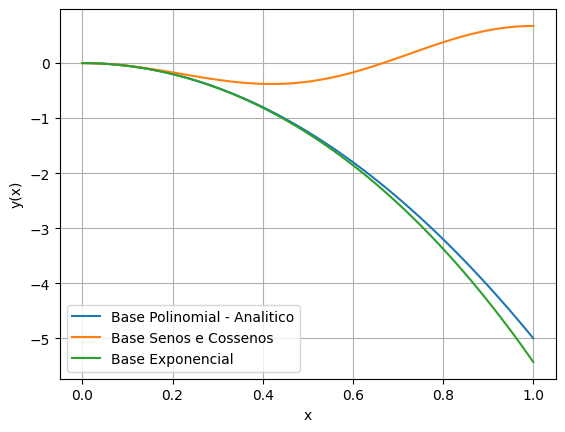

In [13]:
substi = {M0:10,EI:1,L:1}
sp.pprint(substi)

f_residuos_pond_plot = f_residuos_pond.subs(substi)
sp.pprint(f_residuos_pond_plot)

f_residuos_pond_plot1 = f_residuos_pond1.subs(substi)
sp.pprint(f_residuos_pond_plot1)

f_residuos_pond_plot2 = f_residuos_pond2.subs(substi)
sp.pprint(f_residuos_pond_plot2)

T.prepara_plot(f_residuos_pond_plot,x,x0,1,"Base Polinomial - Analitico")
T.prepara_plot(f_residuos_pond_plot1,x,x0,1,"Base Senos e Cossenos")
T.prepara_plot(f_residuos_pond_plot2,x,x0,1,"Base Exponencial")

plt.xlabel('x')
plt.ylabel('y(x)')
plt.grid(True)
plt.legend()
plt.show()